In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
LapData = pd.read_csv(r'D:\uni\uc\ST1\capstone project\Laptop_price.csv', encoding='latin')
print('Shape before deleting duplicate values:', LapData.shape)

# Removing duplicate rows if any
LapData = LapData.drop_duplicates()
print('Shape After deleting duplicate values:', LapData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
LapData.head(10)

Shape before deleting duplicate values: (1000, 7)
Shape After deleting duplicate values: (1000, 7)


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
5,HP,1.881348,16,256,11.943958,4.840268,9543.719980
6,Lenovo,2.940721,32,256,11.713246,4.344846,10390.137319
7,Lenovo,3.016788,4,256,15.588315,2.941120,9214.484506
8,Lenovo,2.560327,4,512,15.026332,2.743620,16372.175284
9,Acer,3.341111,32,512,13.611945,4.093149,18501.832733


### Observations from Data Set
* 0 duplicate values
* file has 1000 entries
* 7 cols
* Brand - String
* Processor_Speed - float
* RAM_Size - int
* Storage_Capacity - int
* Screen_Size - float
* Weight - float
* Price - float

## Problem statement definition
* Create a model to predict the price of a laptop based on the variables listed above
* Target Variable: Price
* Predictors: Brand, Processor_Speed, RAM_Size, Storage_Capacity, Screen_Size, Weight

# Checking class distribution for skewed data
* If the target variables's histogram is too skewed then predictive modeling will produce inaccurate results
* A Bell curve is ideal but slight positive or negative skew should not affect model significantly.
* If the distribution is unlike a bell curve Regression algorithm modelling and analysis my not be the best choice for a predictive model


<function matplotlib.pyplot.show(close=None, block=None)>

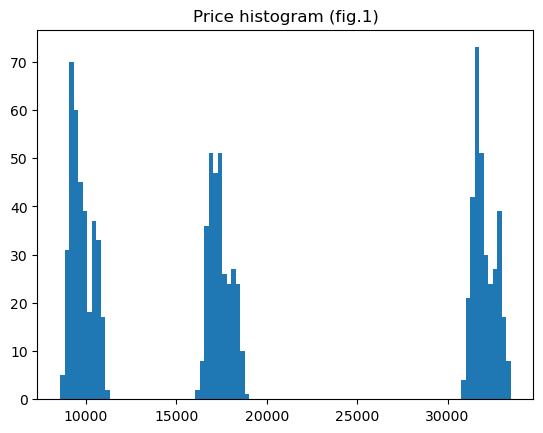

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
dt = LapData['Price']
plt.hist(dt, bins= 100)
plt.title("Price histogram (fig.1)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

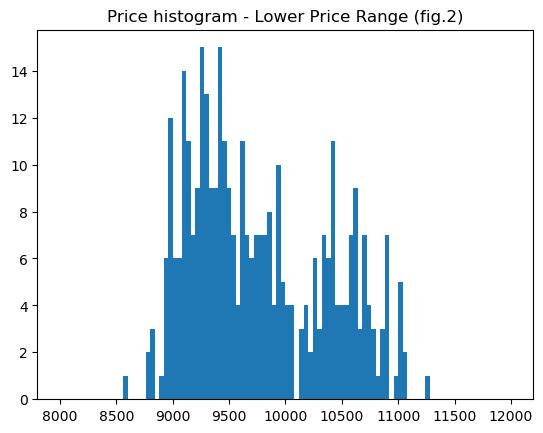

In [4]:
plt.hist(dt, bins= 100, range=(8000,12000))
plt.title("Price histogram - Lower Price Range (fig.2)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

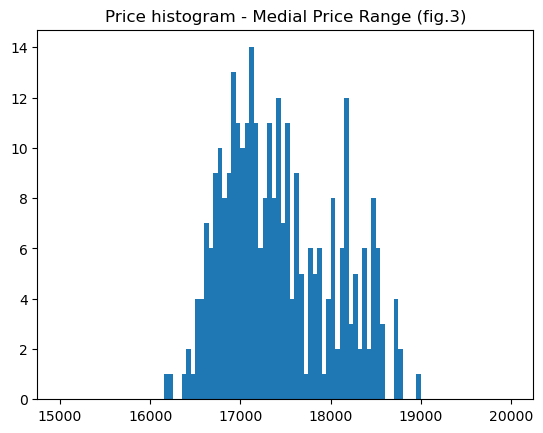

In [5]:
plt.hist(dt, bins= 100, range=(15000,20000))
plt.title("Price histogram - Medial Price Range (fig.3)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

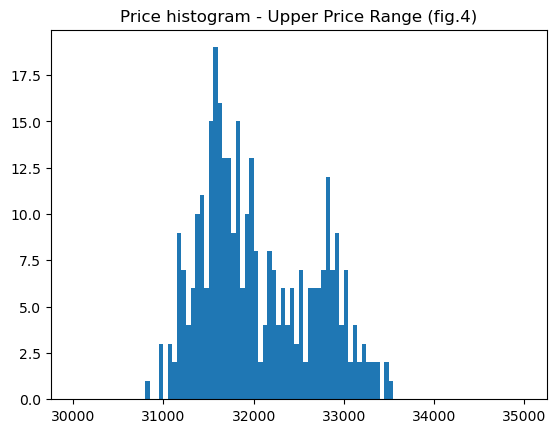

In [6]:
plt.hist(dt, bins= 100, range=(30000,35000))
plt.title("Price histogram - Upper Price Range (fig.4)")
plt.show

## Observations of above distribution
* The distribution shown in fig.1 above shows the histogram of all 'Price' datapoints. fig.1 does not follow the typical bell curve distribution desired for machine learning.
* However the distribution in fig.1 contains 3 distinct bell curve shapes in different price ranges shown in figures 2, 3 and 4.
* This is extremely useful because it shows that some or all predictor variables have a very significant correlation with the Target Variable and the distinct 'Price' ranges shown in fig.1
* To get a clear idea of the data's structure and preditictor correlation it will be useful to analyze the data within the distinct price ranges seperatly.
* Accoringly we will create a new DataFrame containing a variable which identifies which bell curve (fig.2,3 or 4) the dataset belongs in - allowing data seperation and identification of ranges without empty entries - as would result if 'Price' was seperated into 3 different columns.

In [7]:
import pandas as pd
LapDataWPriceRanges = LapData.copy()      # create new DataFrame as a copy to retain integrity of Lapdata
bins = (0, 12000, 20000, 200000)        # create bins containing chosen price ranges
varName = ['Low', 'Medial', 'Upper']      # EntryNames for new variables
LapDataWPriceRanges['Price_Range'] = pd.cut(LapDataWPriceRanges['Price'], bins = bins, labels = varName, right = False)

## Basic Exploratory Data Analysis

In [8]:
# Looking at sample rows in the data
LapDataWPriceRanges.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Price_Range
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065,Medial
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919,Upper
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542,Low
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334,Medial
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718,Upper


In [9]:
# Looking at sample rows in the data
LapDataWPriceRanges.tail()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Price_Range
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017,Upper
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832,Low
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779,Medial
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459,Low
999,Lenovo,1.711980,4,256,16.561498,3.440883,8807.696702,Low


In [10]:
LapDataWPriceRanges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Brand             1000 non-null   object  
 1   Processor_Speed   1000 non-null   float64 
 2   RAM_Size          1000 non-null   int64   
 3   Storage_Capacity  1000 non-null   int64   
 4   Screen_Size       1000 non-null   float64 
 5   Weight            1000 non-null   float64 
 6   Price             1000 non-null   float64 
 7   Price_Range       1000 non-null   category
dtypes: category(1), float64(4), int64(2), object(1)
memory usage: 55.9+ KB


In [11]:
pd.options.display.float_format = '{:.4f}'.format
LapDataWPriceRanges.describe(include='all')

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Price_Range
count,1000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000
unique,5,NaN,NaN,NaN,NaN,NaN,NaN,3
top,Dell,NaN,NaN,NaN,NaN,NaN,NaN,Low
freq,210,NaN,NaN,NaN,NaN,NaN,NaN,357
mean,NaN,2.7506,15.5000,584.5760,14.0568,3.4669,19604.1880,NaN
std,NaN,0.7318,10.9887,313.4385,1.7059,0.8665,9406.0649,NaN
min,NaN,1.5116,4.0000,256.0000,11.0121,2.0006,8570.0130,NaN
25%,NaN,2.0892,8.0000,256.0000,12.6355,2.7172,10114.0129,NaN
50%,NaN,2.7609,16.0000,512.0000,14.0996,3.4646,17287.2419,NaN
75%,NaN,3.3626,32.0000,1000.0000,15.5286,4.2126,31566.2148,NaN


In [12]:
LapDataWPriceRanges.nunique()

Brand                  5
Processor_Speed     1000
RAM_Size               4
Storage_Capacity       3
Screen_Size         1000
Weight              1000
Price               1000
Price_Range            3
dtype: int64

## Basic Exploratory Data Analysis - Observations of above data
* Brand - Catagorical - Selected
* Processor_Speed - Continuous - Selected
* RAM_Size - Catagorical - Selected
* Storage_Capacity - Catagorical - Selected
* Screen_Size - Continuous - Selected
* Weight - Continuous - Selected
* Price_Range - Price_Range - Not selected (Defined from price - used to help with data management)
* Price - Continuous - Selected. Target Variable.

## Removing Unwanted columns
* No columns need be removed

## Visual Exploratory Data Analysis
* **Catagorical Data Types:**
* Brand
* RAM_Size
* Storage_Capacity

### Categorical Analysis with bar charts

In [13]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# We are removing the unique variable names for the columns 'Model', 'Manufacturer' and 'Engine volume' as there are too many and it is illegible
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # cal number of subpolt rows needed
    numPlots = len(colsToPlot)
    numRows = (numPlots + 1) // 2
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=numRows, ncols=2, figsize=(10,5*numRows))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    subPlot = subPlot.flatten() #flatten array to iterate over

    # Filling generated subplots will data iterating over the subPlot array
    for colName, plotNumber in zip(colsToPlot, range(numPlots)):

        currentSubPlot = subPlot[plotNumber]
        inpData.groupby(colName).size().plot(kind='bar',ax=currentSubPlot)


    # Remove empty plots (only if # of plots is odd)
    for i in range(numPlots, len(subPlot)):
        fig.delaxes(subPlot[i])

    fig.tight_layout(rect=[0, 0.03, 1, 0.98]) 
    plt.subplots_adjust(hspace=0.5)

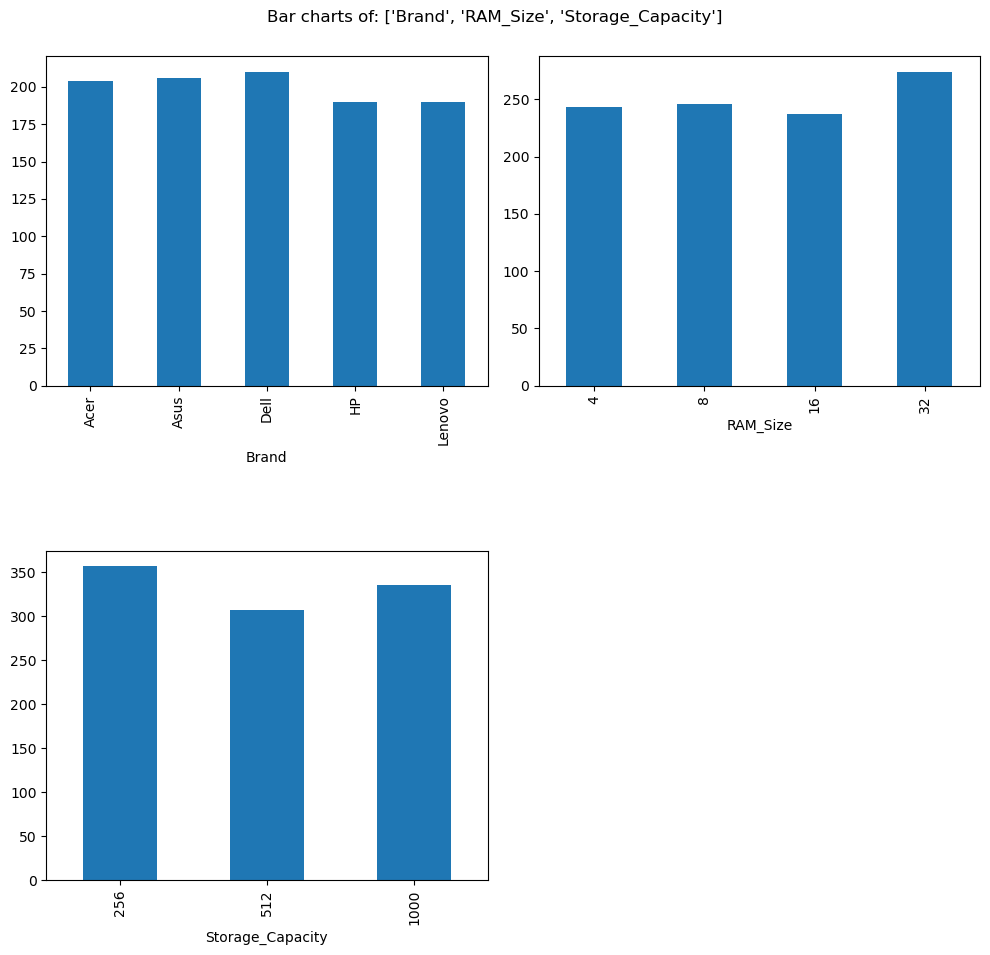

In [14]:
PlotBarCharts(inpData=LapDataWPriceRanges, colsToPlot=['Brand', 'RAM_Size', 'Storage_Capacity'])

## Observations of Visual Exploratory Categorical Data Analysis
* These bar charts allow interpretation of each categorical data column.
* The y-axis in each of these charts represents the frequency of each catagory, whlist the x-axis shows the category names
* Ideally, the frequency of all catagories are approximately similar, else the chart shows a skewed distribution only when one bar dominates a chart.
* None of the variables in these charts are skewed, and all will be selected for further anaylsis

### Visual Anaysis of Continuous Variables with Histograms
* We will be visualizing the selected continuous variables; 'Processor_Speed', 'Screen_Size' and 'Weight'

array([[<Axes: title={'center': 'Weight'}>]], dtype=object)

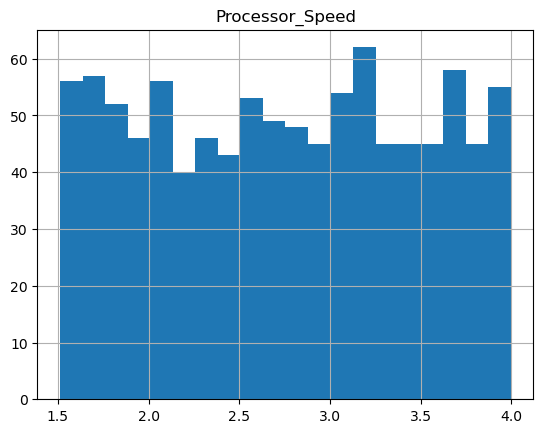

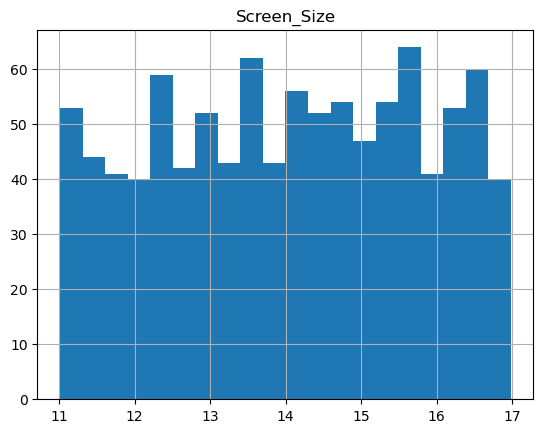

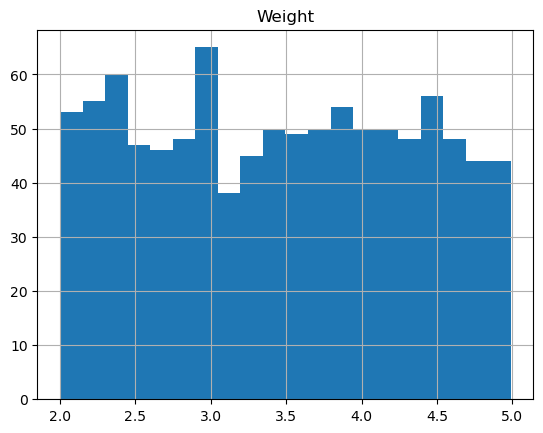

In [15]:
LapDataWPriceRanges.hist(['Processor_Speed'], bins=20)
LapDataWPriceRanges.hist(['Screen_Size'], bins=20)
LapDataWPriceRanges.hist(['Weight'], bins=20)

### Observations of Above Visual Anaysis
* These histograms show the distrobution of data for our continuous variables.
* As usual the x-axis represents the range of values in column, while the y-axis displays the frequency.
* Ideally a bell curve shape is best for selection, which is not the case here but the data is very well distrubuted, with no outliers in any of the histograms.

### Outlier Removal
* At this point in time their are no outliers identified, hence none need be removed!

## Missing Values Analysis

In [16]:
# searching for null values by column
LapDataWPriceRanges.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
Price_Range         0
dtype: int64

## Missing Values Observation
* No missing values are present in the DataFrame and no rows need be removed as a result

## Feature Selection (Attribute Selection)
* The target variable for this dataset is continuous, as a result the following techniques will have to be considered:
* **Scatter Plot** - Visual exploration of variable relationship (Continuous Vs Continuous)
* **Correlation matrix** - purely statistical relationship strength measurement (Continuous Vs Continuous)
* **Box Plot** - Visual exploration of variable relationship (Categorical Vs Continuous)
* **ANOVA test** - statistical relationship strength measurement (Categorical Vs Continuous)
* As the target variable is **not** categorical Chi-Square value and Grouped Bar Plots will not considered for feature selection

## Relationship exploration: Continuous Vs Continuous -- Scatter Charts
* The Target variable 'Price' is continuous and there are 3 continuous predictors we will be considering for selection:
* Processor_Speed
* Screen_Size
* Weight
* Using scatter plots we will visualise the relationship between each predictor and the target variable and measure the strength of relation
* The scatter plots will be filtered by the 'Price_Range' catagory

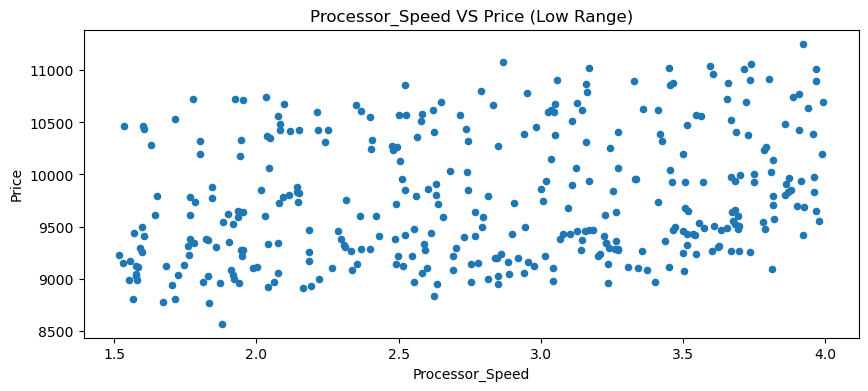

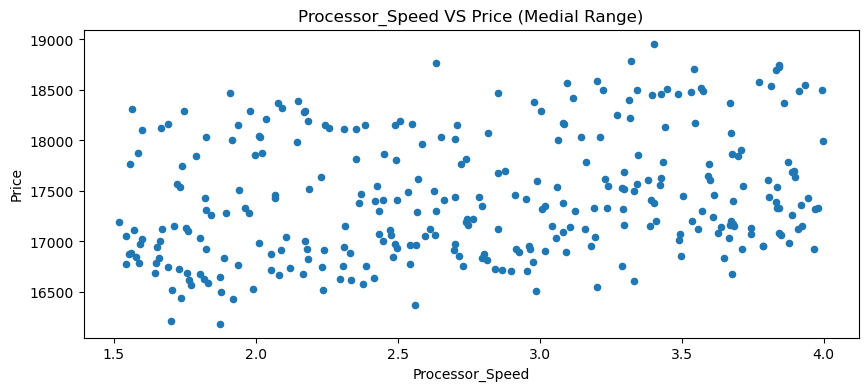

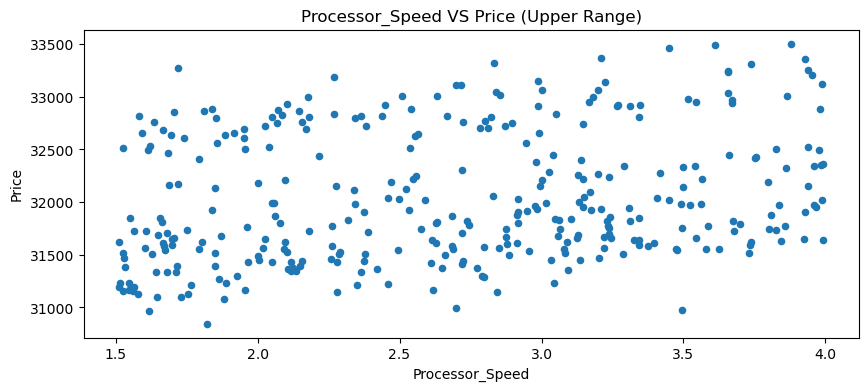

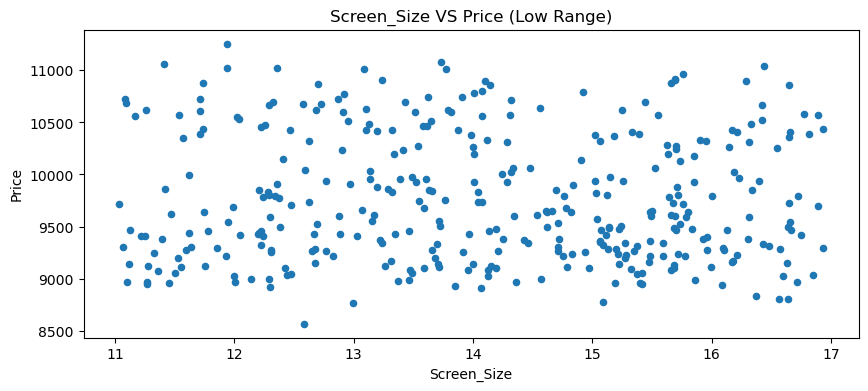

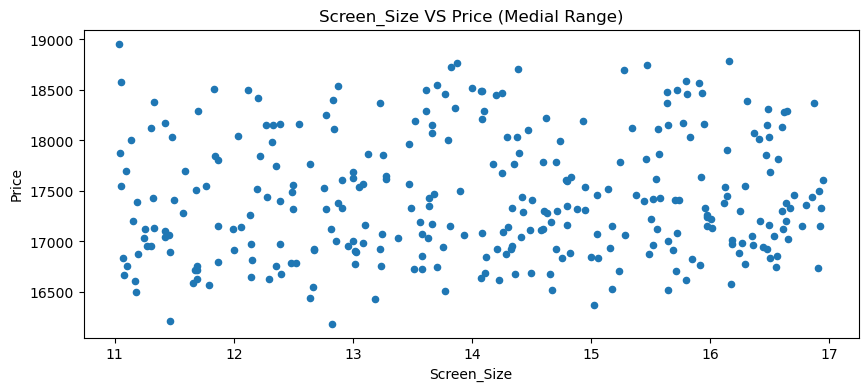

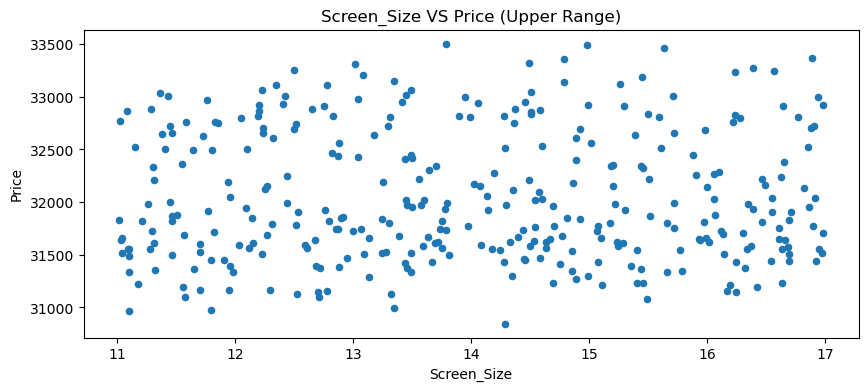

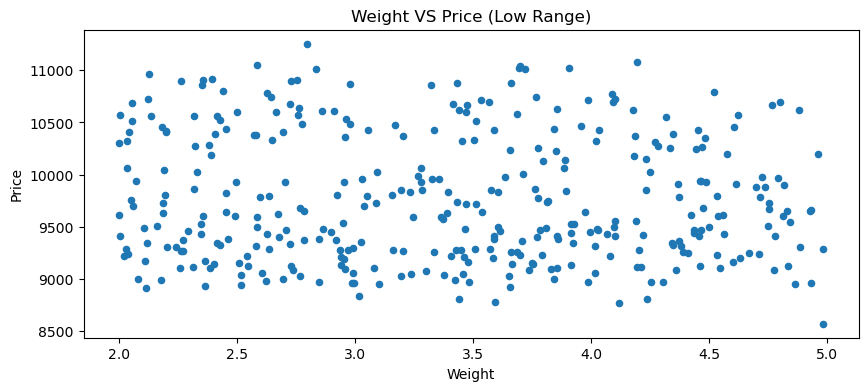

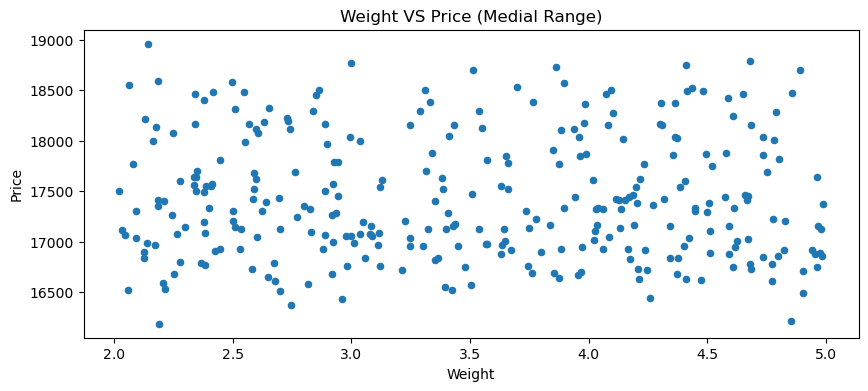

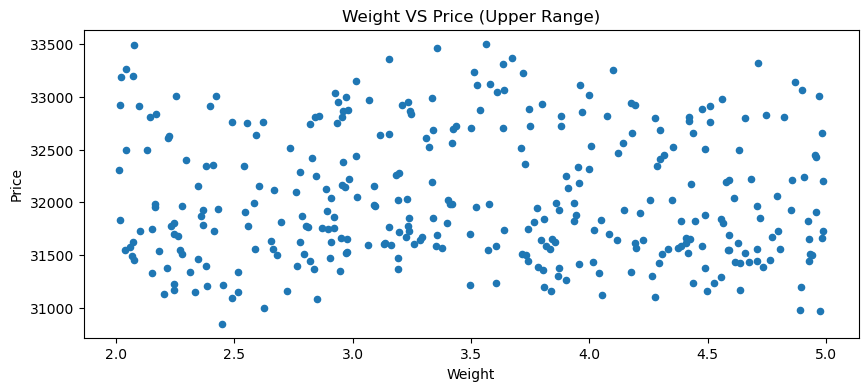

In [17]:
#Creating the scatter plots
import pandas as pd
ContinuousCols=['Processor_Speed', 'Screen_Size', 'Weight']
PriceRanges = ['Low', 'Medial', 'Upper']
for predictor in ContinuousCols:
    for PriceRange in PriceRanges:
        dt = LapDataWPriceRanges[LapDataWPriceRanges['Price_Range'] == PriceRange]
        dt.plot.scatter(x = predictor, y = 'Price', figsize = (10,4), title = f"{predictor} VS Price ({PriceRange} Range)")

## Scatter Charts Interpretation
* There seems to be no trend in any of the scatter plots which implies no correlation for any Continuious variables

## Statistical Feature Selection (Continuous Vs Continuous) using Correlation value
* We will be using Pearson's correlation coefficient in this case which measures correlation on a scale from 0 to (-)1, (-)1 being perfectly correlated and 0 meaning the variables have no correlation at all.
* A correlation value of > 0.5 is a good indication that the variable is a good predictor for the target variable

In [18]:
# Calculating correlation matrix with Price Ranges inculded
ContinuousCols=['Price', 'Processor_Speed', 'Screen_Size', 'Weight']
PriceRanges = ['Low', 'Medial', 'Upper']
for predictor in ContinuousCols:
    for PriceRange in PriceRanges:
        dt = LapDataWPriceRanges[LapDataWPriceRanges['Price_Range'] == PriceRange]
        CorrelationData=dt[ContinuousCols].corr()

CorrelationData

,Price,Processor_Speed,Screen_Size,Weight
Price,1.0000,0.2475,0.0110,-0.0292
Processor_Speed,0.2475,1.0000,-0.0148,-0.0547
Screen_Size,0.0110,-0.0148,1.0000,0.0352
Weight,-0.0292,-0.0547,0.0352,1.0000


In [19]:
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5 ]

Price   1.0000
Name: Price, dtype: float64

In [20]:
# Calculating correlation matrix with raw Price data
ContinuousCols=['Price', 'Processor_Speed', 'Screen_Size', 'Weight']

CorrelationData=LapDataWPriceRanges[ContinuousCols].corr()
CorrelationData

,Price,Processor_Speed,Screen_Size,Weight
Price,1.0000,-0.0507,-0.0267,0.0384
Processor_Speed,-0.0507,1.0000,-0.0134,-0.0546
Screen_Size,-0.0267,-0.0134,1.0000,0.0220
Weight,0.0384,-0.0546,0.0220,1.0000


In [21]:
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5 ]

Price   1.0000
Name: Price, dtype: float64

## Statistical Observations
* In both the adjusted and raw scenarios, Pearson's coefficient found no significant (0.5) correlation between any of the continuous variables.
* This statistical finding is consistent with the results of the scatter plots.
* None of the continuous variables will selected for the machine learning model.

## Relationship exploration: Categorical Vs Continuous -- Box Plots

In [22]:
def PlotBoxPlots(inpData, colsToPlot, Price_Range):
    import matplotlib.pyplot as plt
    
    numPlots = len(colsToPlot)
    numRows = len(colsToPlot)

    fig, subPlot=plt.subplots(nrows=numRows, ncols=1, figsize=(10,5*numRows))

    
    subPlot = subPlot.flatten()

    for colName, plotNumber in zip(colsToPlot, range(numPlots)):
        
        currentSubPlot = subPlot[plotNumber]
        
        inpData.boxplot(column='Price', by=colName, figsize=(5,5), vert=True, ax=subPlot[plotNumber])
        
    for i in range(numPlots, len(subPlot)):
        fig.delaxes(subPlot[i])

    fig.tight_layout(rect=[0, 0.03, 1, 0.98]) 
    if Price_Range:
        fig.suptitle('BoxPlot With Adjusted Price Ranges')
    else:
        fig.suptitle('BoxPlot With Raw Price Entries')
    plt.subplots_adjust(hspace=0.5)


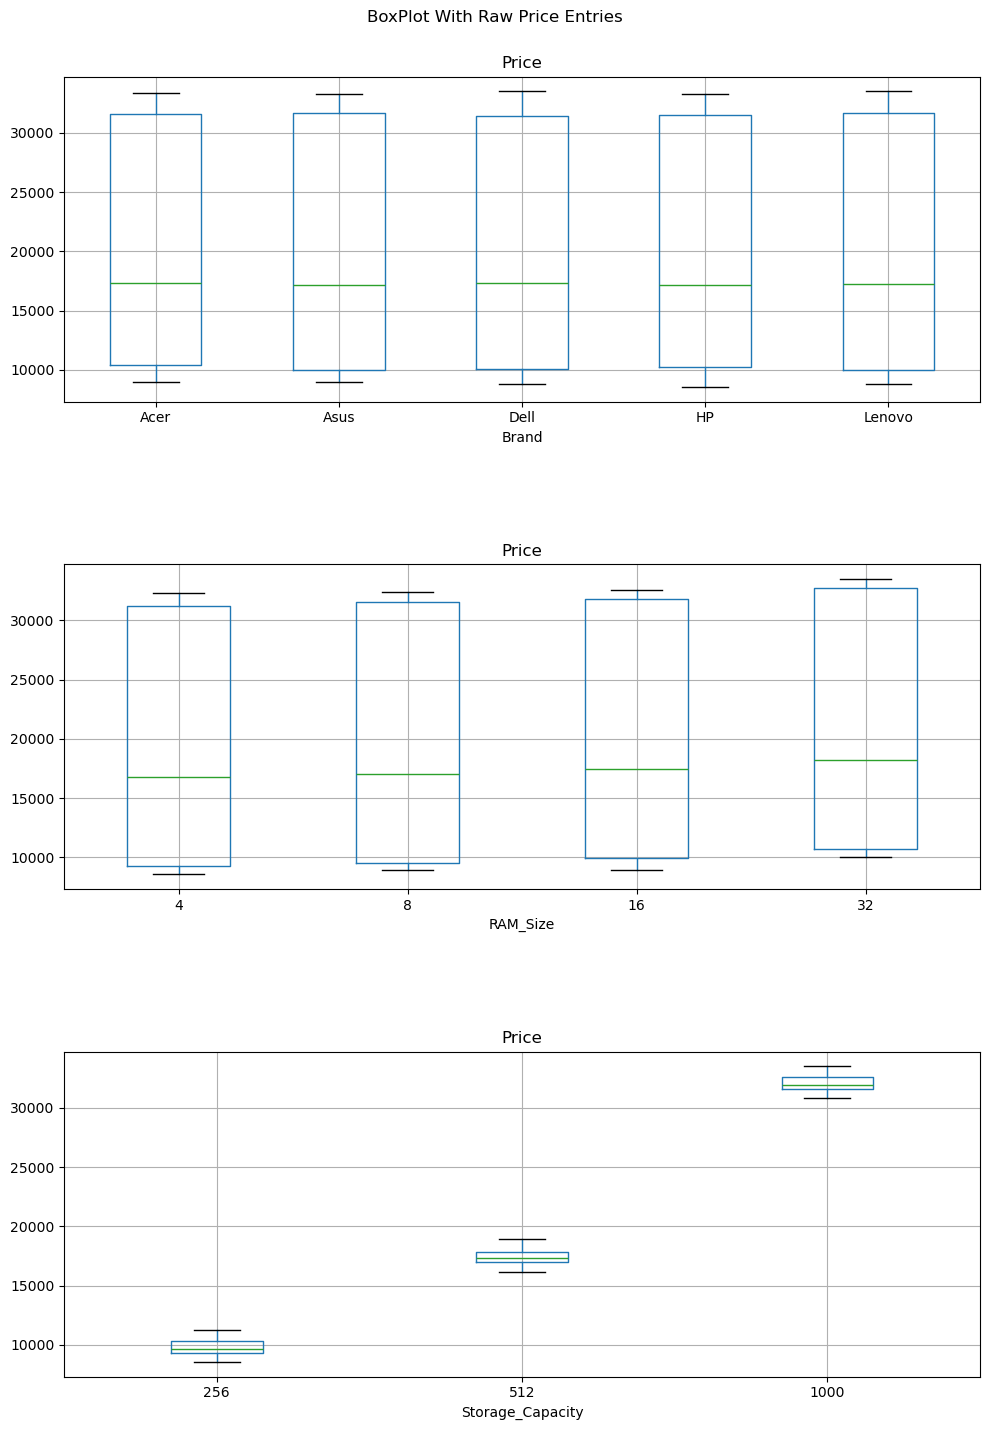

In [23]:
colsToPlot = ['Brand', 'RAM_Size', 'Storage_Capacity']
PlotBoxPlots(inpData = LapDataWPriceRanges, colsToPlot = colsToPlot, Price_Range = False)

## Box Plot Observations - Raw Price Representation
* Storage_Capacity seems to be highly correlated with the target variable
* RAM_Size and Brand seem to have no correlation to Price without range Adjustment

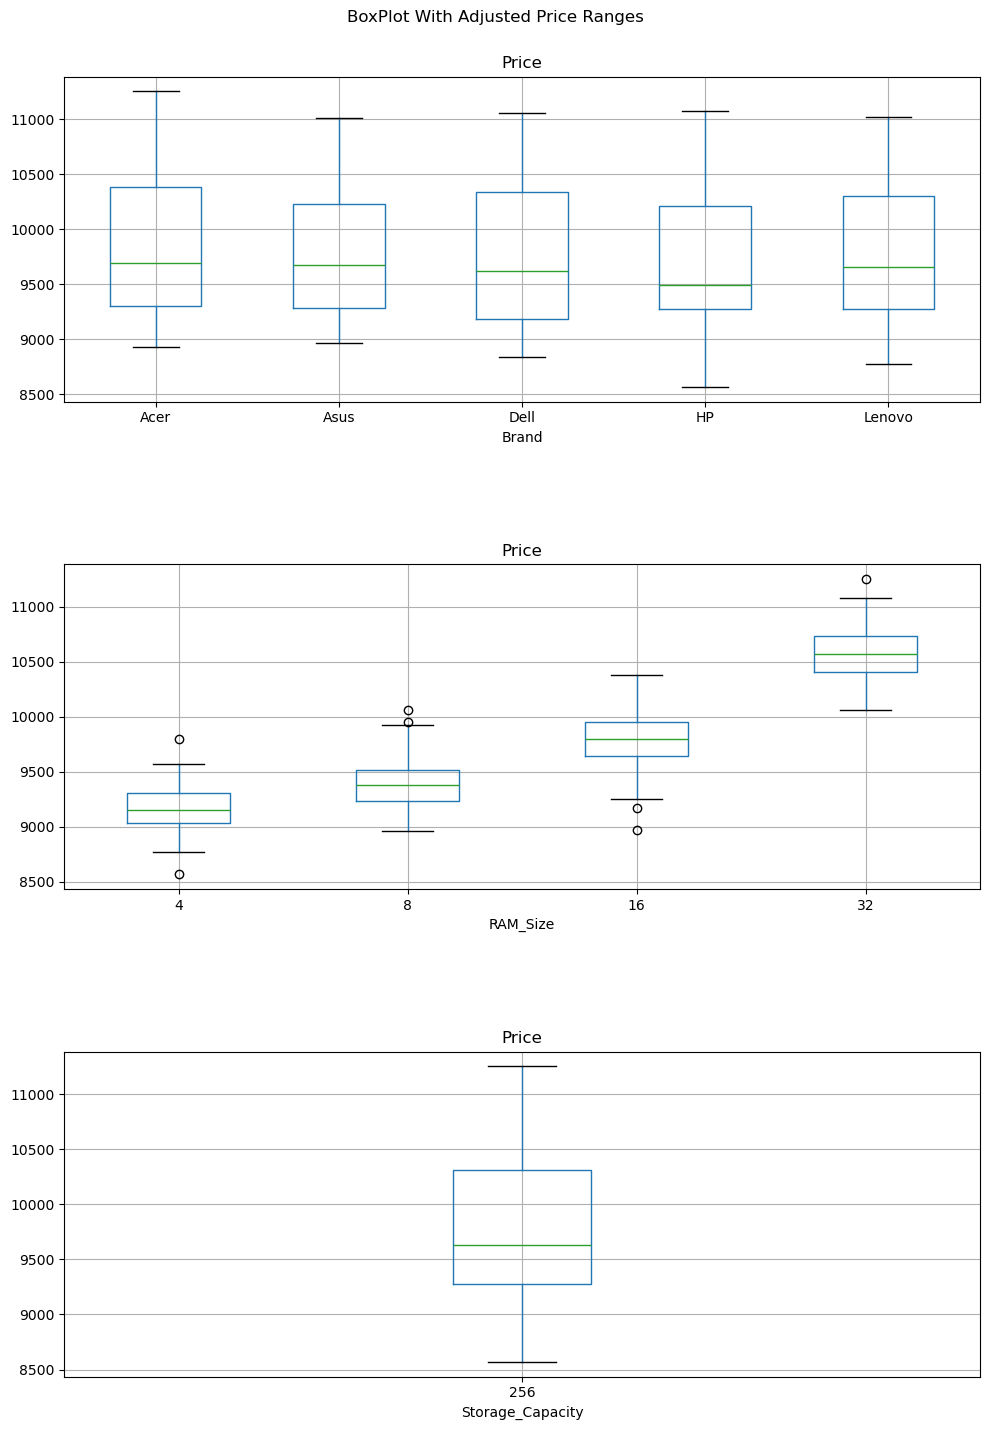

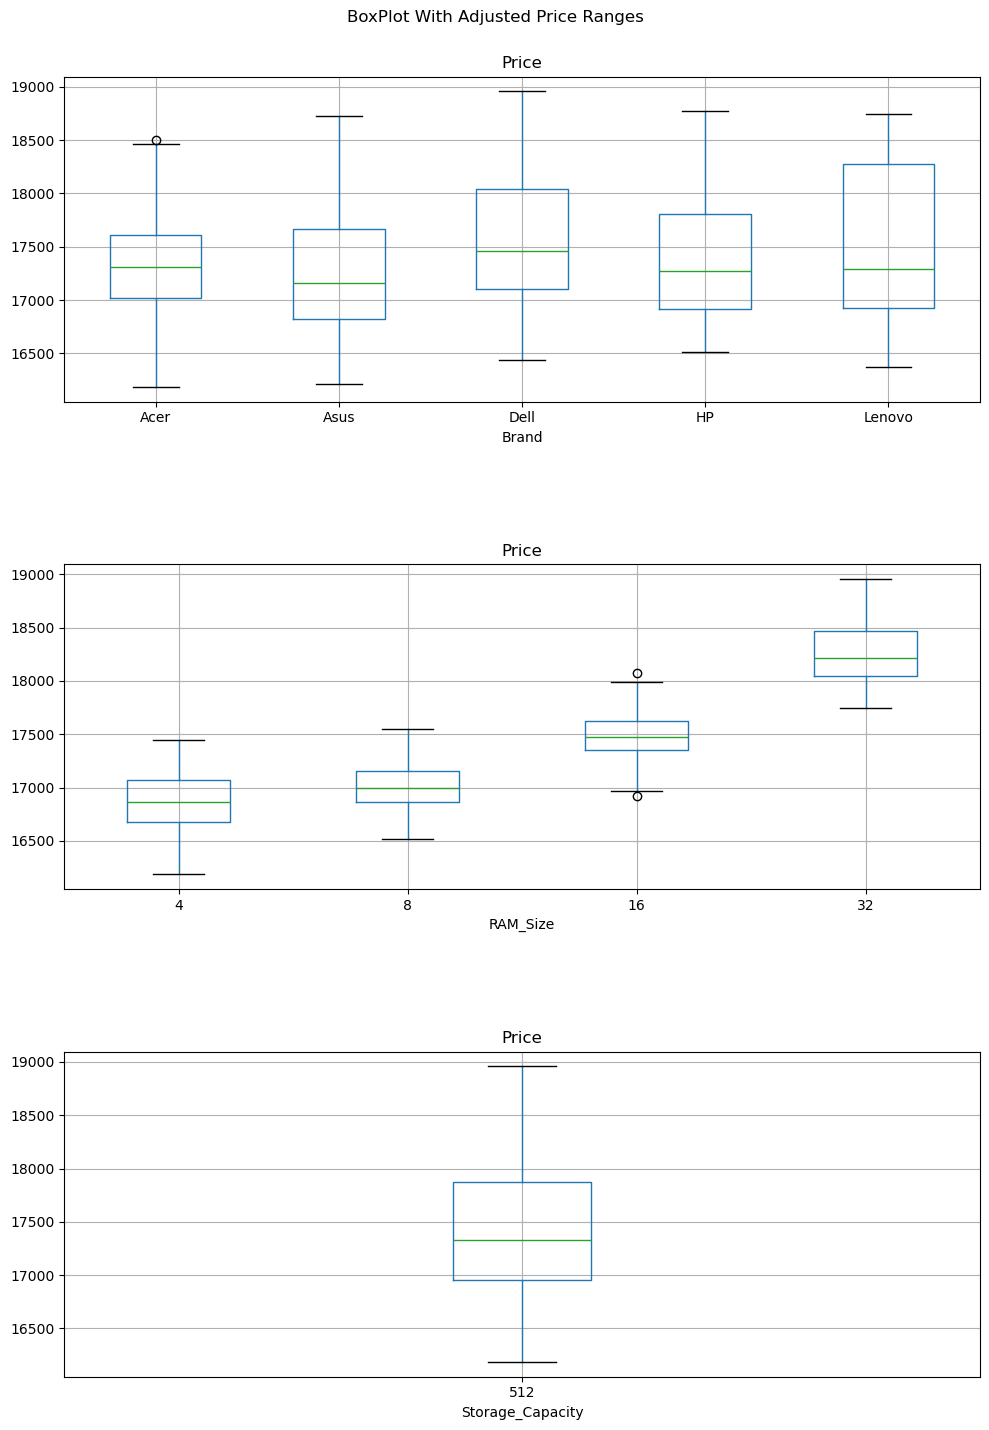

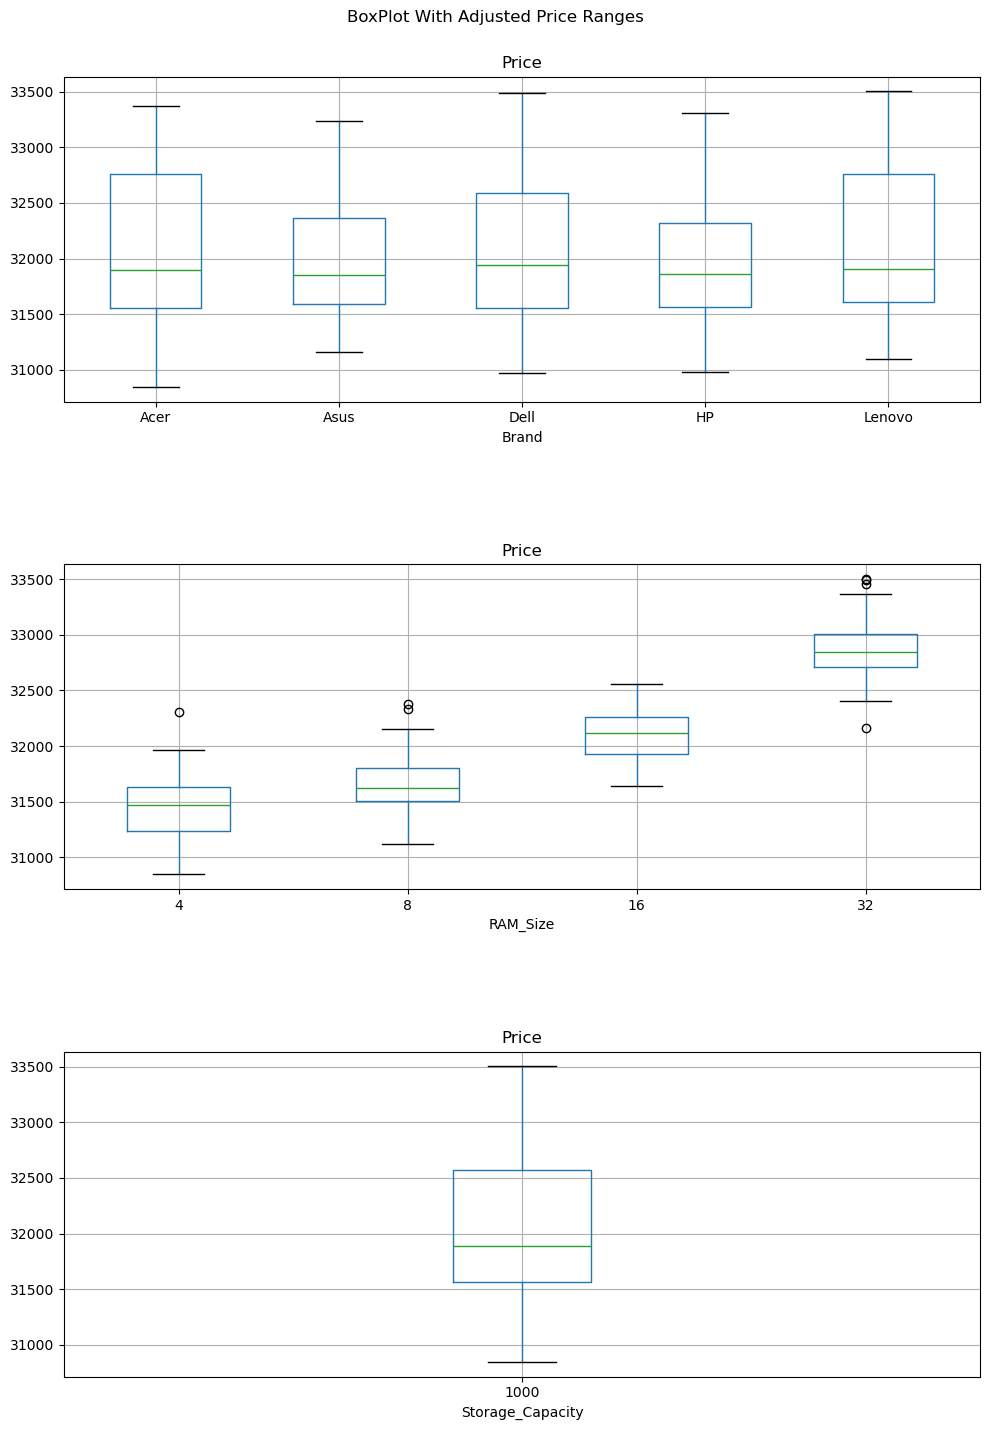

In [24]:
colsToPlot = ['Brand', 'RAM_Size', 'Storage_Capacity']
for PriceRange in PriceRanges:
        dt = LapDataWPriceRanges[LapDataWPriceRanges['Price_Range'] == PriceRange]
        PlotBoxPlots(inpData = dt, colsToPlot = colsToPlot, Price_Range = True)

## Box Plot Observations - Price_Range Implementation
#### Low Price Range Observations:
* Brand may be correlated
* RAM_Size looks to the highly correlated
* Only one Storage_Capacity option is available - not able to determine correlation
#### Medial Price Range Observations:
* Brand also looks to the correlated, slightly more so than in the Low Price Range
* RAM_Size certainly seems very likely to be correlated
* Storage_Capacity - as above
#### Upper Price Range Observations:
* Brand also looks to the correlated, slightly more so than in the Low & Medial Price Range
* RAM_Size again seems  to be correlated
* Storage_Capacity - as above
#### Summation:

* Within the Price_Range adjusted boxplots all 3 Catagorical predictors look to be correlated with the Tartget variable, across all Price Range catagories.

## Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
* The ANOVA test requires at least 2 unique values in an array to perform the test and Seperating Price by Range inadvertently put only one unique value in each of the Storage_Capacity arrays (as seen in the above bar chart). As a result Storage_Capacity will be evaluated with the orignal representation the DataFrame, seperatly from Brand and RAM_Size which will be evaluated with the new Price_range DataFrame.
* This is completely fine, as Storage_Capacity seemed to visualy correlate well to the target variable in the Boxplot of the unchanged DataFrame.

In [25]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [26]:
# Checking Storage_Capacity & other Catagorical predictors under original DataFrame
CategoricalPredictorList = ['Storage_Capacity', 'RAM_Size', 'Brand']
TargetVariable = 'Price'
FunctionAnova(inpData = LapDataWPriceRanges, TargetVariable = TargetVariable, CategoricalPredictorList = CategoricalPredictorList)

##### ANOVA Results ##### 

Storage_Capacity is correlated with Price | P-Value: 0.0
RAM_Size is NOT correlated with Price | P-Value: 0.09529165426315755
Brand is NOT correlated with Price | P-Value: 0.7023859404569301


['Storage_Capacity']

In [27]:
# Checking Correlation of RAM_Size and Brand using the filtered DataFrame
CategoricalPredictorList = ['RAM_Size', 'Brand']
TargetVariable = 'Price'
PriceRanges = ['Low', 'Medial', 'Upper']
for PriceRange in PriceRanges:
    dt = LapDataWPriceRanges[LapDataWPriceRanges['Price_Range'] == PriceRange]
    FunctionAnova(inpData = dt, TargetVariable = TargetVariable, CategoricalPredictorList = CategoricalPredictorList)

##### ANOVA Results ##### 

RAM_Size is correlated with Price | P-Value: 8.307934568795496e-142
Brand is NOT correlated with Price | P-Value: 0.8007259375563373
##### ANOVA Results ##### 

RAM_Size is correlated with Price | P-Value: 1.5840464392378484e-117
Brand is NOT correlated with Price | P-Value: 0.372958479555061
##### ANOVA Results ##### 

RAM_Size is correlated with Price | P-Value: 5.914760881387264e-129
Brand is NOT correlated with Price | P-Value: 0.731927560371023


## Observations from ANOVA test (Categorical Vs Continuous)
#### Original DataFrame ANOVA test Observations
* Storage_Capacity is confirmed to be highly correlated to Price
* RAM_Size and Brand were not correlated
#### Price_range DataFrame ANOVA test Observations
* Storage_Capacity was untestable because of aformentioned array size issues, but passed under the original DataFrame regardless
* RAM_Size is confirmed to be correlated to Price, in all 3 Price Ranges
* Brand Failed to be correlated in all 3 Price ranges
#### Summation:
* Both Storage_Capacity and RAM_Size are confirmed to be correlated to Price according to the ANOVA test
* Final Selected Catagorical Columns:

'Storage_Capacity', 'RAM_Size'

## Selecting final Predictors/Features for building Machine Learning/AI model.
* No Continuous columns showed correlation to price, as a result only Catagorical Columns are being selected as final predictors
* The above results and tests indicate we can confidently select the below final predictors for the machine learning model.
* **'Storage_Capacity'** and **'RAM_Size'**

In [28]:
ChosenPredictors = ['Storage_Capacity', 'RAM_Size']

DataForML = LapDataWPriceRanges [ChosenPredictors]
DataForML.head()

,Storage_Capacity,RAM_Size
0,512,16
1,1000,4
2,256,4
3,512,16
4,1000,32


In [29]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Data Pre-processing for Machine Learning Model Building or Model Development
* Listed below are the Catagorical data types for each selected predictor variable:

* Storage_Capacity - Nominal (already numeric)
* RAM_Size - Nominal (already numeric)
  
#### Summary
* As all of the selected Catagorical Predictors are already represented as intergers no Pre-proccessing or variable conversion is required, all predictors are ready for the Machine Learning Model Development Stage.

## Machine Learning Model Development
* As 'Storage_Capacity' and 'RAM_Size' only correlate accurately with the target variable under different and mutially exlusive circumstances/environments - It is likely best to apply each predictor variable sequentially. Wherein - 'Storage_Capacity' predicts what Price_Range (Low, Medial or Upper) the price is in individually, and then 'RAM_Size' can refine the Price prediction once its conditions are met by the 'Storage_Capacity' predictor
* Spilt data into Training and Testing samples
* Data is spilt randomly
* The model is trained on 70% of the data, and the other 30% is used to test the model

In [30]:
DataForML_Numeric = DataForML.copy()

In [31]:
DataForML_Numeric['Price'] = LapDataWPriceRanges['Price']
DataForML_Numeric['Price_Range'] = LapDataWPriceRanges['Price_Range'] # will be need to implement RAM_Size into learning model
DataForML_Numeric.head()

,Storage_Capacity,RAM_Size,Price,Price_Range
0,512,16,17395.0931,Medial
1,1000,4,31607.6059,Upper
2,256,4,9291.0235,Low
3,512,16,17436.7283,Medial
4,1000,32,32917.9907,Upper


In [32]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Storage_Capacity', 'RAM_Size', 'Price', 'Price_Range'], dtype='object')

### Specific Machine Learning Model Development Plan
* First, use 'Storage_Capacity' as a single feature in its own Training Model to predict Price Range.
* This Model could be Logistic Regression, Random Forest Regressor, etc (Whatever fits best for 'Storage_Capacity') to predict Price Range (Low', 'Medial', 'Upper' (Or more catagories to refine accuracy)).
* Second, use 'RAM_Size' again as a singular predictor to refine the Price to a final value, Ideally using a different Model from the first learning algorithim.
* This way Multiple algorithims are utilized (hopefully increasing accuracy). The sequencial approach 
maximizes the predictive power of each feature and minimizes some of the noise and inaccuracies of using a singular Machine Learning Model.

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# First Define Target and Predictor Variables & Split data into training and testing sets
TargetVariable = 'Price_Range'
Predictor = 'Storage_Capacity'

X=DataForML_Numeric[Predictor].values
y=DataForML_Numeric[TargetVariable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Logistic Regression seems one of the better fits

storage_model = LogisticRegression()
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
storage_model.fit(X_train, y_train)
prediction = storage_model.predict(X_test)

print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data=X_test, columns=[Predictor])
TestingDataResults[TargetVariable] = y_test
TestingDataResults[('Predicted_' + TargetVariable)] = prediction

# Printing sample prediction values
print(TestingDataResults.head())
print(TestingDataResults.tail())
print(TestingDataResults.info())
pd.options.display.float_format = '{:.4f}'.format
TestingDataResults.describe(include='all')


##### Model Validation and Accuracy Calculations ##########
   Storage_Capacity Price_Range Predicted_Price_Range
0              1000       Upper                 Upper
1              1000       Upper                 Upper
2               512      Medial                Medial
3               512      Medial                Medial
4               512      Medial                Medial
     Storage_Capacity Price_Range Predicted_Price_Range
295               512      Medial                Medial
296               256         Low                   Low
297               512      Medial                Medial
298              1000       Upper                 Upper
299               256         Low                   Low
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Storage_Capacity       300 non-null    int64   
 1   Price_Range

,Storage_Capacity,Price_Range,Predicted_Price_Range
count,300.0000,300,300
unique,NaN,3,3
top,NaN,Low,Low
freq,NaN,114,114
mean,556.2400,NaN,NaN
std,303.8355,NaN,NaN
min,256.0000,NaN,NaN
25%,256.0000,NaN,NaN
50%,512.0000,NaN,NaN
75%,1000.0000,NaN,NaN


#### Logistic Regression model seems to be working well, now to train a Model for 'RAM_Size' (The Logistic Regression model also happens to be pretty much the only model that will work with this data)

## Linear Regression Algorithm for 'RAM_Size' predictor

In [86]:
from sklearn.linear_model import LinearRegression
TargetVariable = 'Price'
Predictors = ['RAM_Size']
for price_range in prediction:
    # Filter data for the current price range
    filtered_data = DataForML_Numeric[DataForML_Numeric['Price_Range'] == price_range]
    
    # Prepare data for 'RAM_Size' predictor
    X = filtered_data[TargetVariable].values
    y = filtered_data[Predictors].values
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)
    
    # Train LinearRegression
    RegModel = LinearRegression()

    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    
    LREG=RegModel.fit(X_train, y_train)

    prediction=LREG.predict(X_test)


In [79]:
# LinearRegression
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Prepare data for cross-validation
X_cross_val = DataForML_Numeric['RAM_Size'].values.reshape(-1, 1)
y_cross_val = DataForML_Numeric['Price'].values


# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X_cross_val , y_cross_val, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

R2 Value: 0.8351712840744867

##### Model Validation and Accuracy Calculations ##########
    RAM_Size  Price  PredictedPrice
0  9084.3716      4          4.0000
1  8969.4997      4          2.0000
2 10558.3744     32         29.0000
3  9240.6761      4          7.0000
4  8807.6967      4         -0.0000
Mean Accuracy on test data: 64.49652777777777
Median Accuracy on test data: 75.0

Accuracy values for 10-fold Cross Validation:
 [45.06593811 49.69099799 45.10137228 49.01291353 51.59060515 41.87492653
 45.00589926 54.62088534 42.70310992 44.58294341]

Final Average Accuracy of the model: 46.92


## RandomForestRegressor for 'RAM_Size' predictor

In [81]:
from sklearn.ensemble import RandomForestRegressor
TargetVariable = 'Price'
Predictors = ['RAM_Size']
for price_range in prediction:
    # Filter data for the current price range
    filtered_data = DataForML_Numeric[DataForML_Numeric['Price_Range'] == price_range]
    
    # Prepare data for 'RAM_Size' predictor
    X = filtered_data[TargetVariable].values
    y = filtered_data[Predictors].values
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)
    
    # Train Random Forest Regressor Model
    RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')

    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    
    LREG=RegModel.fit(X_train, y_train)

    prediction=LREG.predict(X_test)

In [87]:
# RandomForestRegressor 
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Prepare data for cross-validation
X_cross_val = DataForML_Numeric['RAM_Size'].values.reshape(-1, 1)
y_cross_val = DataForML_Numeric['Price'].values


# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X_cross_val , y_cross_val, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

R2 Value: 0.8351712840744867

##### Model Validation and Accuracy Calculations ##########
    RAM_Size  Price  PredictedPrice
0  9084.3716      4          4.0000
1  8969.4997      4          2.0000
2 10558.3744     32         29.0000
3  9240.6761      4          7.0000
4  8807.6967      4         -0.0000
Mean Accuracy on test data: 64.49652777777777
Median Accuracy on test data: 75.0

Accuracy values for 10-fold Cross Validation:
 [45.06593811 49.69099799 45.10137228 49.01291353 51.59060515 41.87492653
 45.00589926 54.62088534 42.70310992 44.58294341]

Final Average Accuracy of the model: 46.92


## Revaluation of Machine Learning Model Development
* The idea that using 2 different predictive models procedually to improve model accuracy is a good idea in theory, and possibly in practice, but not with this Data Set and implementation.
* Every Model applied achieved a Final Average Accuracy of < 50, which undeniably aweful.
* In all likelyhood the first model applied in the sequence was accurate as the feature variable was directly correlated to Price, and the target variable Price_Range is essentally a catagorical analog of Price. But it is extremely hard to test rigorously as the output is not Numerical and is essentially useless.
* Likely The second application of Machine Learning wherein specific price ranges were iterated over 3 times to essentially force 'RAM_Size' into correlation with price, is where the issue origninated from.
* Regardless this technique of sequential modeling is interesting and when properly applied to the correct DataFrame may be quite useful. In addition it was a good learning experience regarding the issues with overengineering and overthinking.

  
* Instead the sigular Predictor 'Storage_Capacity' will be use to train a machine learning model to predict price.

In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# First Define Target and Predictor Variables & Split data into training and testing sets
TargetVariable = 'Price'
Predictors = ['Storage_Capacity']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# The Predictor sets must be reshaped as we are only consdering one Predictor Variable
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

## Multiple Linear Regression Algorithm For ML/AI model building

In [121]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Prepare data for cross-validation
X_cross_val = DataForML_Numeric['Storage_Capacity'].values.reshape(-1, 1)
y_cross_val = DataForML_Numeric['Price'].values

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X_cross_val , y_cross_val, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9959488613440752

##### Model Validation and Accuracy Calculations ##########
   Storage_Capacity      Price  PredictedPrice
0              1000 31558.9967      32053.0000
1              1000 32885.8348      32053.0000
2               512 17420.4617      17440.0000
3               512 17694.4820      17440.0000
4               512 17545.4145      17440.0000
Mean Accuracy on test data: 96.46996776549943
Median Accuracy on test data: 97.22568957108622

Accuracy values for 10-fold Cross Validation:
 [96.66105893 96.64667026 96.83521136 97.06296222 96.74876588 96.43837856
 96.56259941 97.17231239 96.49999755 96.17624651]

Final Average Accuracy of the model: 96.68


#### Final Average Accuracy of > 95 is much more promising than the first method.

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9959518668454509

##### Model Validation and Accuracy Calculations ##########
   Storage_Capacity      Price  PredictedPrice
0              1000 31558.9967      32060.0000
1              1000 32885.8348      32060.0000
2               512 17420.4617      17415.0000
3               512 17694.4820      17415.0000
4               512 17545.4145      17415.0000
Mean Accuracy on test data: 96.46135377763531
Median Accuracy on test data: 97.30476783861315

Accuracy values for 10-fold Cross Validation:
 [96.66087783 96.65003649 96.81957283 97.05963134 96.73157957 96.43775639
 96.55417752 97.14819256 96.49355055 96.17737384]

Final Average Accuracy of the model: 96.67


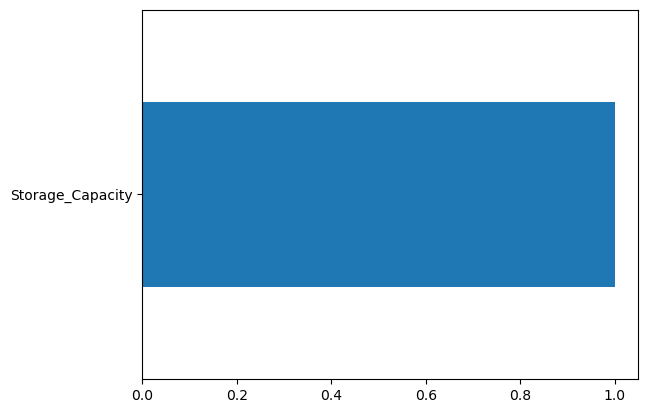

In [94]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Prepare data for cross-validation
X_cross_val = DataForML_Numeric['Storage_Capacity'].values.reshape(-1, 1)
y_cross_val = DataForML_Numeric['Price'].values


# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X_cross_val , y_cross_val, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.9959517892083725

##### Model Validation and Accuracy Calculations ##########
   Storage_Capacity      Price  PredictedPrice
0              1000 31558.9967      32057.0000
1              1000 32885.8348      32057.0000
2               512 17420.4617      17413.0000
3               512 17694.4820      17413.0000
4               512 17545.4145      17413.0000
Mean Accuracy on test data: 96.45958838498125
Median Accuracy on test data: 97.32448469808868

Accuracy values for 10-fold Cross Validation:
 [96.66007156 96.65046059 96.81735292 97.05842079 96.7314673  96.43798524
 96.55376601 97.15179748 96.49437299 96.17929582]

Final Average Accuracy of the model: 96.67


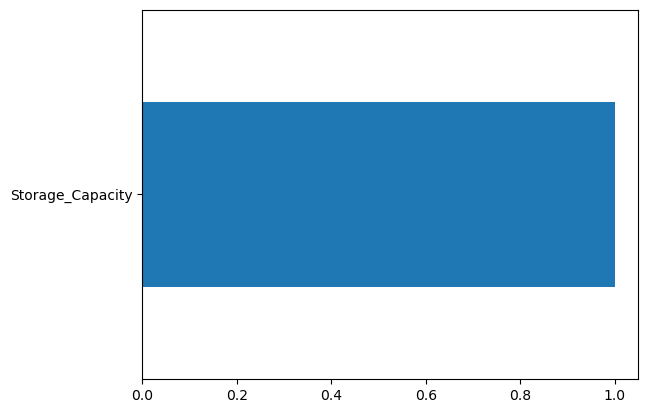

In [95]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Prepare data for cross-validation
X_cross_val = DataForML_Numeric['Storage_Capacity'].values.reshape(-1, 1)
y_cross_val = DataForML_Numeric['Price'].values


# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X_cross_val , y_cross_val, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9959397286984403

##### Model Validation and Accuracy Calculations ##########
   RAM_Size      Price  PredictedPrice
0      1000 31558.9967      32106.0000
1      1000 32885.8348      32106.0000
2       512 17420.4617      17445.0000
3       512 17694.4820      17445.0000
4       512 17545.4145      17445.0000
Mean Accuracy on test data: 96.42751089797248
Median Accuracy on test data: 97.19996229191335

Accuracy values for 10-fold Cross Validation:
 [96.62444923 96.62983281 96.81854457 97.01584988 96.67291057 96.41325875
 96.50380685 97.131192   96.41695741 96.13975938]

Final Average Accuracy of the model: 96.64


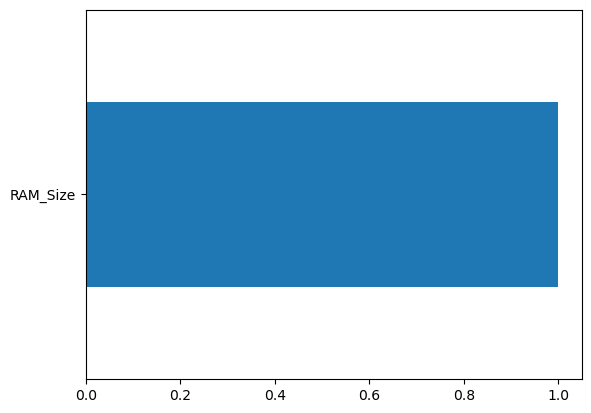

In [73]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Prepare data for cross-validation
X_cross_val = DataForML_Numeric['Storage_Capacity'].values.reshape(-1, 1)
y_cross_val = DataForML_Numeric['Price'].values


# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X_cross_val , y_cross_val, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Model Deployment
* All of the models post Revaluation of Machine Learning Model Development have accuracy of Final Average Accuracy of over 96
* Any of them can be chosen, but I will be choosing the Multiple Linear Regression Algorithm, as it is had a very marginally higher accuracy then the other Models and it is overall the most simplistic.

## Retraining the final model using 100% data

In [105]:
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()
TargetVariable = 'Price'
Predictors = ['Storage_Capacity']
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values
Final_LRG_Model = RegModel.fit(X,y)

# Save the model as a serialized file which can be stored anywhere

In [106]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open ('Final_LRG_Model.pk1', 'wb') as fileWriteStream:
    pickle.dump(Final_LRG_Model, fileWriteStream)
    fileWriteStream.close()
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: D:\uni\uc\ST1\capstone project


# Create a python function

In [129]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Data was never standardised 

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # no nomial variables

    Predictors=['Storage_Capacity']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    import pickle
    with open('Final_LRG_Model.pk1', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        fileReadStream.close()

     # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

# Step 25: Calling the function for some new data

In [133]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[512, 1020, 350],columns=['Storage_Capacity'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

   Storage_Capacity
0               512
1              1020
2               350


,Prediction
0,17430.7909
1,32643.6119
2,12579.4582


# Deploying the model with few parameters
# Function for predictions API

In [138]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_Storage_Capacity):
    SampleInputData=pd.DataFrame(data=[inp_Storage_Capacity], columns=['Storage_Capacity'])

    
    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

FunctionGeneratePrediction(inp_Storage_Capacity = 280)


'{"Prediction":{"0":10483.2033602724}}'

# Web Deployment using Flask Library/Package
# Installing the flask library required to create the API

In [135]:
!pip install flask

# Creating Flask API

In [136]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [139]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        Storage_Capacity_value = np.int64(request.args.get('Storage_Capacity')) 

        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(inp_Storage_Capacity = Storage_Capacity_value)


        return(prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

# Starting the API engine

In [ ]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:9000
Press CTRL+C to quit
127.0.0.1 - - [03/May/2024 17:50:15] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [03/May/2024 17:50:15] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [03/May/2024 17:50:48] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [03/May/2024 17:52:55] "GET /prediction_api?Storage_Capacity=673 HTTP/1.1" 200 -


In [ ]:
'''
Sample URL to call the API
Copy and paste below URL in the web browser
http://127.0.0.1:9000/prediction_api?Storage_Capacity=821
'''

# END OF PROGRAMMING PROJECT